# Convolutional Neural Networks

In this notebook, we will solve a regression problems with neural networks. Remember regression consists of predicting a continuous target.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from PIL import Image
from plotly.subplots import make_subplots
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [2]:
import tensorflow as tf
tf.random.set_seed(2)  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.datasets import mnist

## MNIST dataset

The MNIST dataset is a widely used benchmark in computer vision. It stands for "Modified National Institute of Standards and Technology" and has many handwritten digits.
Here are the key characteristics of the MNIST dataset:

- `Image Format`: Each data sample in the MNIST dataset is represented as a grayscale image. The images are 28 pixels by 28 pixels in size, resulting in 784 pixels per image.

- `Training and Testing Sets`: The MNIST dataset is divided into two main sets: training and testing. The training set contains 60,000 labeled examples, while the testing set consists of 10,000. This split allows researchers and practitioners to evaluate the performance of their models on unseen data.

- `Handwritten Digits`: The dataset primarily focuses on handwritten digits from 0 to 9. Each image in the dataset corresponds to a single number. The goal is to train models that can accurately classify and recognize handwritten digits.

- `Labeling`: Each image in the MNIST dataset is associated with a corresponding label indicating the actual digit it represents. The labels are integers ranging from 0 to 9.

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Train = %i cases \t Test = %i cases' %(len(X_train), len(X_test)))

Train = 60000 cases 	 Test = 10000 cases


In [4]:
print('Training Set shape:', X_train.shape)
print('Dimensions of each observation:', X_train[0].ndim)

Training Set shape: (60000, 28, 28)
Dimensions of each observation: 2


In [5]:
# Plotting one image
image_index = 50       # You may select anything up to 60,000
selected_image = X_train[image_index]

selected_image = np.reshape(selected_image, (28, 28))

fig = px.imshow(selected_image, color_continuous_scale='gray',                 
                width=400, height=400)
fig.update_layout(title=f"Label: {y_train[image_index]}", title_font_size=16)
# Remove the x-axis and y-axis
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [6]:
print('Five first rows of the numeric representation of the image:')
print(X_train[image_index][:5])

Five first rows of the numeric representation of the image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]]


### Preprocesing data

In [7]:
# Standardize the data (normalize pixel values between 0 and 1)
X_train = X_train / 255
X_test  = X_test  / 255
print(X_train[image_index][:5].round(2))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.22 0.55 0.49
  0.69 0.78 0.38 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [8]:
# Reshape the input data to match the CNN input shape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

In [9]:
# Categorical classes
print('Class of selected image:', y_train[image_index])

Class of selected image: 3


In [10]:
# Converting class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)
print('Class of selected image:', y_train[image_index])

Class of selected image: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Model using convnets

We will configure the convnet to process size inputs (28, 28, 1), which is the format of MNIST images. We will pass the argument input_shape=(28, 28, 1) to the first layer.

In [11]:
model1 = Sequential()

# first convolutional layer
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))

# second convolutional layer
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

# fully connected layer
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Total params: 225,034
Trainable params: 225,034
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model1.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

In [13]:
# Train the model
history1 = model1.fit(X_train, y_train, 
        batch_size=128, 
        epochs=5, 
        validation_data=(X_test, y_test));

Epoch 1/5
469/469 [==============================] - 20s 41ms/step - loss: 0.2009 - accuracy: 0.9421 - val_loss: 0.0536 - val_accuracy: 0.9819
Epoch 2/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.0349 - val_accuracy: 0.9877
Epoch 3/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0355 - val_accuracy: 0.9872
Epoch 4/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0370 - val_accuracy: 0.9889
Epoch 5/5
469/469 [==============================] - 20s 42ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0274 - val_accuracy: 0.9906


In [14]:
# Evaluate the model
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss     = %.4f' % score[0])
print('Test accuracy = %.4f' % score[1])

Test loss     = 0.0274
Test accuracy = 0.9906


Let's use `plot_history` for plotting the results.

In [15]:
def plot_history(history):
    '''
    Plotting the results of the neural network training process
    '''
    hist = history.history
    d = pd.DataFrame({'epochs': [epoch + 1 for epoch in history.epoch],
                      'accuracy': hist['accuracy'],
                      'val_accuracy': hist['val_accuracy'],
                      'loss': hist['loss'],
                      'val_loss': hist['val_loss']})
    
    fig = px.line(d, x='epochs', y=['loss', 'val_loss', 'accuracy', 'val_accuracy'],
                  color_discrete_sequence=['orange', 'peru', 'yellowgreen', 'darkolivegreen'],
                  labels={'epochs': 'Epochs', 'value': 'Loss/Accuracy', 'variable': 'Legend'},
                  title='Neural Network Training History', width=800, height=500)
    
    fig.update_traces(mode='lines+markers')
    
    return fig.show()

In [16]:
plot_history(history1)

As you can see, results are very good!

Let's analyze another example.

## Cats vs. dogs dataset

This section will focus on classifying images as cats or dogs.

We have six folders with images of cats and dogs as follows:
- `cats_and_dogs\train\cats` with 1500 different cats pictures
- `cats_and_dogs\test\cats` with 500 different cats pictures

- `cats_and_dogs\train\dogs` with 1500 different dogs pictures
- `cats_and_dogs\test\dogs` with 500 different dogs pictures

In [17]:
# Define the paths to some cat and dog files
cat_paths = [
    'cats_and_dogs\\train\\cats\\cat.11.jpg',    
    'cats_and_dogs\\train\\cats\\cat.8.jpg',
    'cats_and_dogs\\train\\cats\\cat.18.jpg',
]

dog_paths = [     
    'cats_and_dogs\\train\\dogs\\dog.10.jpg',
    'cats_and_dogs\\train\\dogs\\dog.55.jpg',
    'cats_and_dogs\\train\\dogs\\dog.60.jpg', 
]


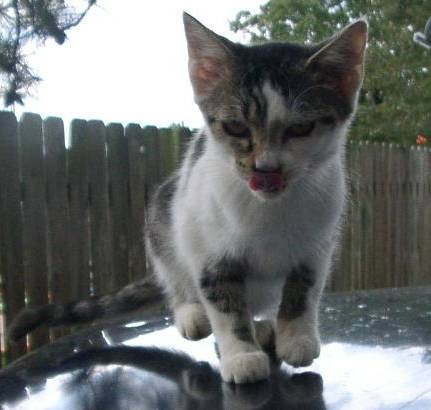
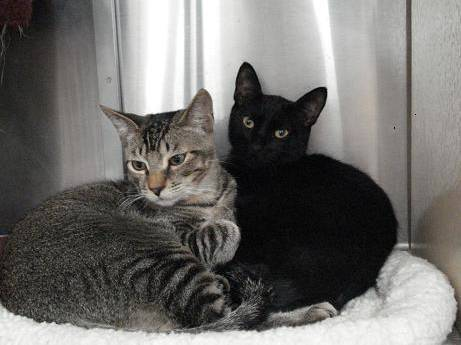
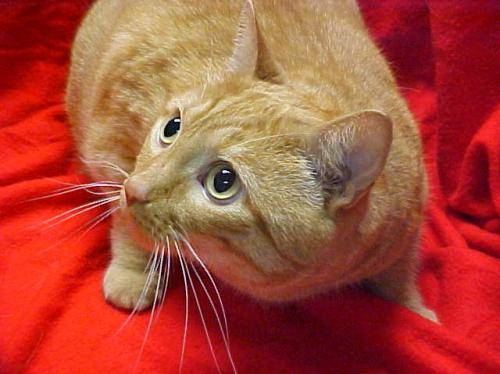
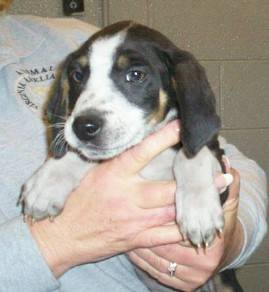
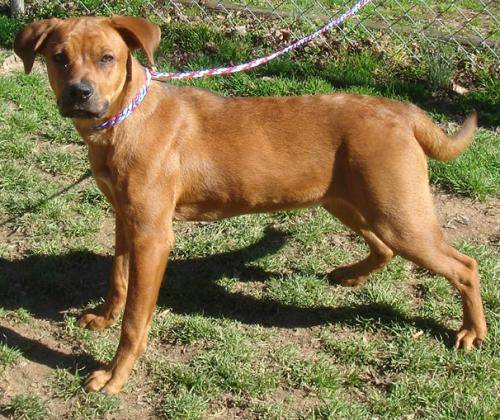
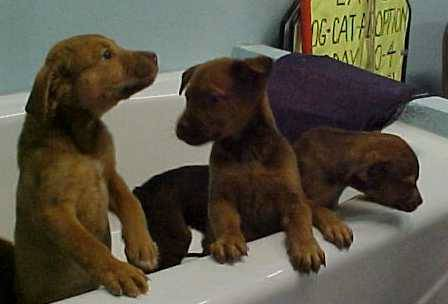

In [18]:
fig = make_subplots(rows=2, cols=3)

# Ploting cats
for i, path in enumerate(cat_paths):
    image = Image.open(path)
    fig.add_trace(px.imshow(image).data[0], row=1, col=i + 1)

# Ploting dogs
for i, path in enumerate(dog_paths):
    image = Image.open(path)
    fig.add_trace(px.imshow(image).data[0], row=2, col=i + 1)

# Remove the x-axis and y-axis
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)

# Set the figure size
fig.update_layout(title="Some cats and dogs in the training set", 
                  title_font_size=16, width=800, height=500)
fig.show()

As you can see, the samples are heterogeneous in size, appearance, and background.

### Preprocesing data

Remember that data should be formatted into appropriately preprocessed floating point tensors before being fed into the network.

Steps:
1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to (0, 1) interval (neural networks prefer to deal with small input    values)


The class `ImageDataGenerator` sets up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. Let's use it!

In [19]:
train_datagen      = ImageDataGenerator(rescale=1./255)     # rescales all images by 1/25
test_datagen       = ImageDataGenerator(rescale=1./255)     # rescales all images by 1/25

The `ImageDataGenerator` class has the method `flow_from_directory()` to read the images from folders containing images.

We have to reshape the photos before modeling so all images have the same shape. There are many ways to achieve it; the most common is a simple resize operation that will stretch and deform the aspect ratio of each image and force it into the new shape.

Smaller inputs mean a model that is faster to train; typically, this concern dominates the choice of image size. In this case, we will follow this approach and choose a fixed size of 128×128 pixels.

In [20]:
train_generator = train_datagen.flow_from_directory(
            'cats_and_dogs/train',      # it is the path to the train directory, where the images are 
            target_size=(128, 128),     # resizes all images to 128 x 128
            batch_size=20,              # number of images to be yielded from the generator per batch
            shuffle=False,
            class_mode='binary')        # set 'binary' because we have only two classes to predict

Found 3000 images belonging to 2 classes.


In [21]:
test_generator = test_datagen.flow_from_directory(
            'cats_and_dogs/test',       # it is the path to the test directory, where the images are                  
            target_size=(128, 128),     # resizes all images to 128 x 128
            batch_size=20,              # number of images to be yielded from the generator per batch
            shuffle=False,
            class_mode='binary')        # set 'binary' because we have only two classes to predict

Found 1000 images belonging to 2 classes.


The output of these generators produce batches of 128 × 128 RGB images (shape (20, 128, 128, 3)) and binary labels (shape (20,)). 

There are 20 samples in each batch (`batch_size`).

### Model using Convolutional Neural Networks

We are dealing with bigger images and a more complex problem; therefore, we will make the network larger: it will have one more Conv2D + MaxPooling2D stage. It both augments the network's capacity and further reduces the size of the feature maps. We started from inputs of size 128 × 128 (a somewhat arbitrary choice), and end up with size 6 × 6 feature maps just before the Flatten layer, see `summary()` results.

Because we are attacking a binary-classification problem, we will end the network with a single unit (a `Dense` layer of size 1) and a `sigmoid` activation.

In [22]:
model2 = Sequential()

# convolutional layers
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

# fully connected layer
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)     

In [23]:
# Compile the model
model2.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

In [24]:
history2 = model2.fit(train_generator,
            steps_per_epoch = 100,      # 100 batches of 20 samples = 2000 samples                
            epochs=20,
            validation_data = test_generator,
            validation_steps = test_generator.n//test_generator.batch_size)

Epoch 1/20
100/100 [==============================] - 62s 615ms/step - loss: 0.9210 - accuracy: 0.5200 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 42s 421ms/step - loss: 0.6939 - accuracy: 0.5620 - val_loss: 0.6910 - val_accuracy: 0.5270
Epoch 3/20
100/100 [==============================] - 38s 377ms/step - loss: 0.6907 - accuracy: 0.5455 - val_loss: 0.6882 - val_accuracy: 0.5170
Epoch 4/20
100/100 [==============================] - 38s 383ms/step - loss: 0.6767 - accuracy: 0.5775 - val_loss: 0.6669 - val_accuracy: 0.5860
Epoch 5/20
100/100 [==============================] - 34s 341ms/step - loss: 0.6666 - accuracy: 0.6060 - val_loss: 0.6535 - val_accuracy: 0.6410
Epoch 6/20
100/100 [==============================] - 35s 353ms/step - loss: 0.6643 - accuracy: 0.6215 - val_loss: 0.6659 - val_accuracy: 0.6130
Epoch 7/20
100/100 [==============================] - 37s 367ms/step - loss: 0.6436 - accuracy: 0.6440 - val_loss: 0.6470 - val_ac

In [25]:
# Evaluate the model
score2 = model2.evaluate(test_generator, steps=len(test_generator))
print('Test loss     = %.4f' % score2[0])
print('Test accuracy = %.4f' % score2[1])

50/50 [==============================] - 4s 86ms/step - loss: 1.6015 - accuracy: 0.6870
Test loss     = 1.6015
Test accuracy = 0.6870


In [26]:
plot_history(history2)

When the training loss of a neural network continues to decrease while the validation loss starts to increase, it is usually an indication of overfitting. Overfitting occurs when a model learns to perform well on the training data but fails to generalize to unseen data.

### Overfitting solution

Overfitting is caused by having too few samples to learn from.
If you had unlimited data, your model would be exposed to every possible aspect of the data distribution: it would never overfit. 

`Data augmentation` generates more training data from existing training samples by augmenting them via several random transformations. It helps expose the model to more aspects of the data and generalize better.

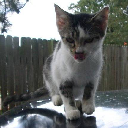

In [27]:
# Load one image
image_path = 'cats_and_dogs\\train\\cats\\cat.11.jpg'
image = tf.keras.preprocessing.image.load_img(image_path,  target_size=(128, 128))
image

In [28]:
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array

array([[[[235., 241., 239.],
         [241., 253., 253.],
         [234., 250., 250.],
         ...,
         [ 47.,  62.,  43.],
         [ 72.,  87.,  68.],
         [ 61.,  76.,  57.]],

        [[173., 181., 184.],
         [228., 239., 245.],
         [164., 179., 186.],
         ...,
         [ 55.,  68.,  48.],
         [ 65.,  78.,  58.],
         [ 59.,  72.,  52.]],

        [[109., 117., 130.],
         [130., 138., 151.],
         [214., 224., 234.],
         ...,
         [ 70.,  79.,  58.],
         [ 64.,  73.,  52.],
         [ 56.,  65.,  44.]],

        ...,

        [[ 65.,  76.,  80.],
         [ 90., 100., 109.],
         [ 88.,  98., 110.],
         ...,
         [197., 212., 241.],
         [197., 213., 239.],
         [202., 218., 243.]],

        [[122., 131., 140.],
         [204., 213., 222.],
         [176., 184., 197.],
         ...,
         [190., 205., 234.],
         [187., 203., 229.],
         [193., 209., 234.]],

        [[115., 118., 133.],
       

In [29]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,          # Random rotation between -30 and 30 degrees
    width_shift_range=0.2,      # Randomly shift the width by 20%
    height_shift_range=0.2,     # Randomly shift the height by 20%
    shear_range=0.2,            # Apply random shear transformations
    zoom_range=0.2,             # Randomly zoom by 20%
    horizontal_flip=True,       # Randomly flip the image horizontally
    fill_mode='nearest'         # Fill any missing pixels after transformation
)

In [30]:
# Generate transformed images
transformed_images = []
for batch in datagen.flow(image_array, batch_size=1):
    transformed_images.append(np.squeeze(batch, axis=0))
    if len(transformed_images) >= 3:
        break

Let's display some randomly augmented training images.


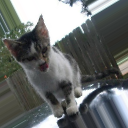
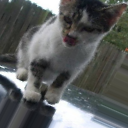
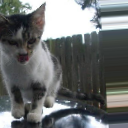

In [31]:
fig = make_subplots(rows=1, cols=3)

for i, transformed_image in enumerate(transformed_images):
    fig.add_trace(px.imshow(transformed_image / 255).data[0], row=1, col=i+1) 

# Remove the x-axis and y-axis
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)

# Set the figure size
fig.update_layout(title="Transformations applied to the image",
                  title_font_size=16, width=800, height=350)
fig.show()    

### Model with augmented data

When you train a new network using this `data-augmentation` configuration, the network will never see the same input twice. Notice the inputs comes from a small number of original images; therefore, this scenario is not ideal.

In [32]:
# Training the convnet using data-augmentation generators
train_datagen2b = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

In [33]:
train_generator2b = train_datagen2b.flow_from_directory(
                  'cats_and_dogs/train',    # it is the path to the test directory, where the images are
                  target_size=(128, 128),   # resizes all images to 128 x 128
                  batch_size=20,            # number of images to be yielded from the generator per batch
                  class_mode='binary')      # set "binary" if you have only two classes to predict

Found 3000 images belonging to 2 classes.


In [34]:
# Test data shouldn't be augmented
test_datagen2b = ImageDataGenerator(rescale=1./255)

In [35]:
test_generator2b = test_datagen2b.flow_from_directory(
                'cats_and_dogs/test',       # it is the path to the test directory, where the images are
                target_size=(128, 128),     # resizes all images to 128 x 128
                batch_size=20,              # number of images to be yielded from the generator per batch
                class_mode='binary')        # set "binary" if you have only two classes to predict

Found 1000 images belonging to 2 classes.


In [36]:
history2b = model2.fit(train_generator2b,
            steps_per_epoch = 100,          # 100 batches of 20 samples = 2000 samples                
            epochs=20,
            validation_data = test_generator2b,
            validation_steps = test_generator2b.n//test_generator2b.batch_size)

Epoch 1/20
100/100 [==============================] - 42s 420ms/step - loss: 0.7263 - accuracy: 0.6320 - val_loss: 0.6135 - val_accuracy: 0.6800
Epoch 2/20
100/100 [==============================] - 41s 409ms/step - loss: 0.6062 - accuracy: 0.6815 - val_loss: 0.5667 - val_accuracy: 0.7240
Epoch 3/20
100/100 [==============================] - 42s 418ms/step - loss: 0.5770 - accuracy: 0.7030 - val_loss: 0.5953 - val_accuracy: 0.7130
Epoch 4/20
100/100 [==============================] - 41s 414ms/step - loss: 0.5650 - accuracy: 0.7155 - val_loss: 0.5435 - val_accuracy: 0.7220
Epoch 5/20
100/100 [==============================] - 41s 411ms/step - loss: 0.5983 - accuracy: 0.6875 - val_loss: 0.5650 - val_accuracy: 0.7170
Epoch 6/20
100/100 [==============================] - 43s 433ms/step - loss: 0.5687 - accuracy: 0.7005 - val_loss: 0.5304 - val_accuracy: 0.7190
Epoch 7/20
100/100 [==============================] - 2060s 21s/step - loss: 0.5689 - accuracy: 0.7105 - val_loss: 0.5934 - val_ac

In [37]:
# Evaluate the model
score2 = model2.evaluate(test_generator2b, steps=len(test_generator2b)) 
print('Test loss     = %.4f' % score2[0]) 
print('Test accuracy = %.4f' % score2[1]) 

50/50 [==============================] - 4s 86ms/step - loss: 0.4966 - accuracy: 0.7790
Test loss     = 0.4966
Test accuracy = 0.7790


In [38]:
plot_history(history2b)

The overfitting problem is now solved!

In [39]:
# Saving the model
model2.save('model_cats_and_dogs.h5') 

## References

- Chollet, F. (2021) *Deep Learning with Python*, Second Edition, Manning Publications Co, chap 3